In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the dataset
data = pd.read_csv('/content/train.csv', delimiter=';')
data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls,Churn
0,10001,Female,35.0,MN,150,415 695 24 37,Voice mail,28,174.4,75.0,...,14.44,201.6,130.0,9.07,11.0,4.0,2.97,56.13,1,0
1,10010,Female,43.0,AR,87,408 673 99 45,NaN,0,185.8,119.0,...,16.35,200.0,96.0,9.00,6.6,4.0,1.78,58.72,1,0
2,10029,Female,39.0,ND,180,415 693 30 62,NaN,0,224.9,105.0,...,21.25,216.1,73.0,9.72,6.7,5.0,1.81,71.01,3,1
3,10030,Female,36.0,AL,200,408 248 27 61,NaN,0,128.2,87.0,...,11.32,177.6,123.0,7.99,11.2,2.0,3.02,44.12,1,0
4,10122,Male,37.0,DE,122,510 297 57 75,NaN,0,157.1,134.0,...,15.72,197.2,59.0,8.87,8.5,5.0,2.30,53.6,4,1


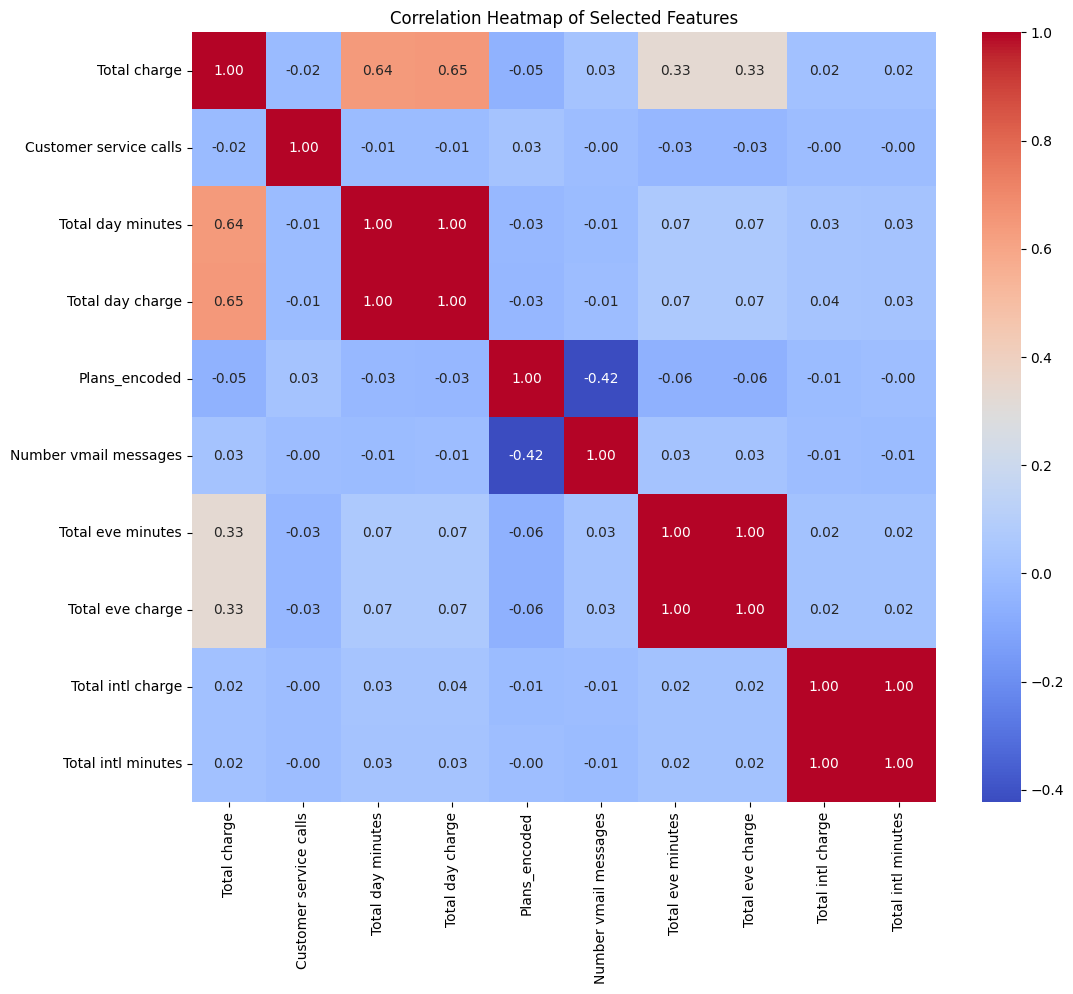

In [20]:
Corr_data = pd.read_csv('/content/train.csv', delimiter=';')

import matplotlib.pyplot as plt
import seaborn as sns

# Select the specified features for the correlation heatmap
features_for_heatmap = ['Total charge', 'Customer service calls', 'Total day minutes',
                        'Total day charge', 'Plans', 'Number vmail messages',
                        'Total eve minutes', 'Total eve charge', 'Total intl charge',
                        'Total intl minutes']

# Convert 'Total charge' column to numeric, handling errors
Corr_data['Total charge'] = pd.to_numeric(Corr_data['Total charge'].str.replace(' hundred', ''), errors='coerce')
# Remove ' hundred' and convert to numeric, invalid values will be NaN

# Convert 'Plans' column to numeric representation using Label Encoding
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the 'Plans' column and transform it
Corr_data['Plans_encoded'] = le.fit_transform(Corr_data['Plans'])

# Update features_for_heatmap to use the encoded 'Plans' column
features_for_heatmap = ['Total charge', 'Customer service calls', 'Total day minutes',
                        'Total day charge', 'Plans_encoded', 'Number vmail messages',
                        'Total eve minutes', 'Total eve charge', 'Total intl charge',
                        'Total intl minutes']

# Convert all columns in features_for_heatmap to numeric
for col in features_for_heatmap:
    Corr_data[col] = pd.to_numeric(Corr_data[col], errors='coerce')

# Calculate the correlation matrix for the selected features
correlation_matrix = Corr_data[features_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [21]:
# prompt: drop Phone number and State from the dataset

data = data.drop(['Phone number', 'State', 'Total intl charge', 'Total day charge', 'Total eve charge'], axis=1)
print(data.head(5))

      ID     Sex   Age  Account length       Plans  Number vmail messages  \
0  10001  Female  35.0             150  Voice mail                     28   
1  10010  Female  43.0              87         NaN                      0   
2  10029  Female  39.0             180         NaN                      0   
3  10030  Female  36.0             200         NaN                      0   
4  10122    Male  37.0             122         NaN                      0   

  Total day minutes Total day calls  Total eve minutes  Total eve calls  \
0             174.4            75.0              169.9             80.0   
1             185.8           119.0              192.3             83.0   
2             224.9           105.0              250.0            101.0   
3             128.2            87.0              133.2            105.0   
4             157.1           134.0              184.9            122.0   

  Total night minutes  Total night calls  Total night charge  \
0               201.6 

In [22]:

# Replace null values in the 'plans' column with 'No Plan'
data['Plans'] = data['Plans'].fillna('No Plan')

data.head()

,ID,Sex,Age,Account length,Plans,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn
0,10001,Female,35.0,150,Voice mail,28,174.4,75.0,169.9,80.0,201.6,130.0,9.07,11.0,4.0,56.13,1,0
1,10010,Female,43.0,87,No Plan,0,185.8,119.0,192.3,83.0,200.0,96.0,9.00,6.6,4.0,58.72,1,0
2,10029,Female,39.0,180,No Plan,0,224.9,105.0,250.0,101.0,216.1,73.0,9.72,6.7,5.0,71.01,3,1
3,10030,Female,36.0,200,No Plan,0,128.2,87.0,133.2,105.0,177.6,123.0,7.99,11.2,2.0,44.12,1,0
4,10122,Male,37.0,122,No Plan,0,157.1,134.0,184.9,122.0,197.2,59.0,8.87,8.5,5.0,53.6,4,1


In [23]:
# get dummies for sex and no plan

# Create dummy variables for 'sex' and 'plans'
data = pd.get_dummies(data, columns=['Sex', 'Plans'], drop_first=True)

data.head()

,ID,Age,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total charge,Customer service calls,Churn,Sex_Male,"Plans_International, Voice mail",Plans_No Plan,Plans_Voice mail
0,10001,35.0,150,28,174.4,75.0,169.9,80.0,201.6,130.0,9.07,11.0,4.0,56.13,1,0,False,False,False,True
1,10010,43.0,87,0,185.8,119.0,192.3,83.0,200.0,96.0,9.00,6.6,4.0,58.72,1,0,False,False,True,False
2,10029,39.0,180,0,224.9,105.0,250.0,101.0,216.1,73.0,9.72,6.7,5.0,71.01,3,1,False,False,True,False
3,10030,36.0,200,0,128.2,87.0,133.2,105.0,177.6,123.0,7.99,11.2,2.0,44.12,1,0,False,False,True,False
4,10122,37.0,122,0,157.1,134.0,184.9,122.0,197.2,59.0,8.87,8.5,5.0,53.6,4,1,True,False,True,False


In [24]:

# Convert specified columns to numeric, coercing errors to NaN
for col in ['Total day minutes', 'Total day calls', 'Total night minutes', 'Total intl minutes', 'Total charge', 'Customer service calls']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill NaN values resulting from conversion errors (if any) - choose an appropriate method
data.fillna(0, inplace=True) #Example using 0, could be mean, median etc.

# Now the columns should be numeric
data.dtypes

,0
ID,int64
Age,float64
Account length,int64
Number vmail messages,int64
Total day minutes,float64
Total day calls,float64
Total eve minutes,float64
Total eve calls,float64
Total night minutes,float64
Total night calls,float64


In [25]:
# Assuming you have a DataFrame 'df' with the target column 'Churn'
# Replace 'df' and 'Churn' with your actual DataFrame and target column name
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get feature importance
importance = rf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Display the top 5 important features
print("Top 5 important features:")
print(feature_importance.head(10))

Accuracy: 0.956
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       429
           1       1.00      0.69      0.82        71

    accuracy                           0.96       500
   macro avg       0.98      0.85      0.90       500
weighted avg       0.96      0.96      0.95       500

Top 5 important features:
                   feature  importance
13            Total charge    0.236665
14  Customer service calls    0.126945
4        Total day minutes    0.115392
3    Number vmail messages    0.052348
6        Total eve minutes    0.049257
11      Total intl minutes    0.047960
7          Total eve calls    0.036867
18        Plans_Voice mail    0.035121
8      Total night minutes    0.034252
17           Plans_No Plan    0.034246


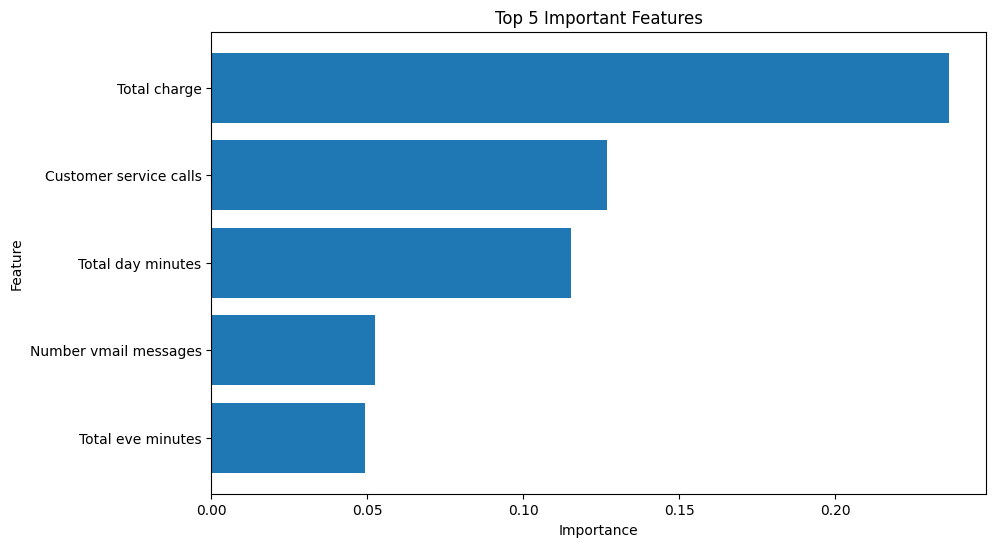

In [26]:
# graph the top 5 features

import matplotlib.pyplot as plt

# Assuming 'feature_importance' DataFrame from the previous code
top_5_features = feature_importance.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_features['feature'], top_5_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

In [27]:
#  run a random forrest on customer churns

# Assuming you have a DataFrame 'data' with the target column 'Churn'
# and have already preprocessed the data as shown in your example.

# Replace 'data' and 'Churn' with your actual DataFrame and target column name
X = data.drop(columns=['Churn'])
y = data['Churn']

# Ensure all columns in X are numeric
# This converts any remaining string columns (like 'Sex') to numeric using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get feature importance
importance = rf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Display the top 5 important features
print("Top 10 important features:")
print(feature_importance.head(10))

Accuracy: 0.956
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       429
           1       1.00      0.69      0.82        71

    accuracy                           0.96       500
   macro avg       0.98      0.85      0.90       500
weighted avg       0.96      0.96      0.95       500

Top 10 important features:
                   feature  importance
13            Total charge    0.236665
14  Customer service calls    0.126945
4        Total day minutes    0.115392
3    Number vmail messages    0.052348
6        Total eve minutes    0.049257
11      Total intl minutes    0.047960
7          Total eve calls    0.036867
18        Plans_Voice mail    0.035121
8      Total night minutes    0.034252
17           Plans_No Plan    0.034246


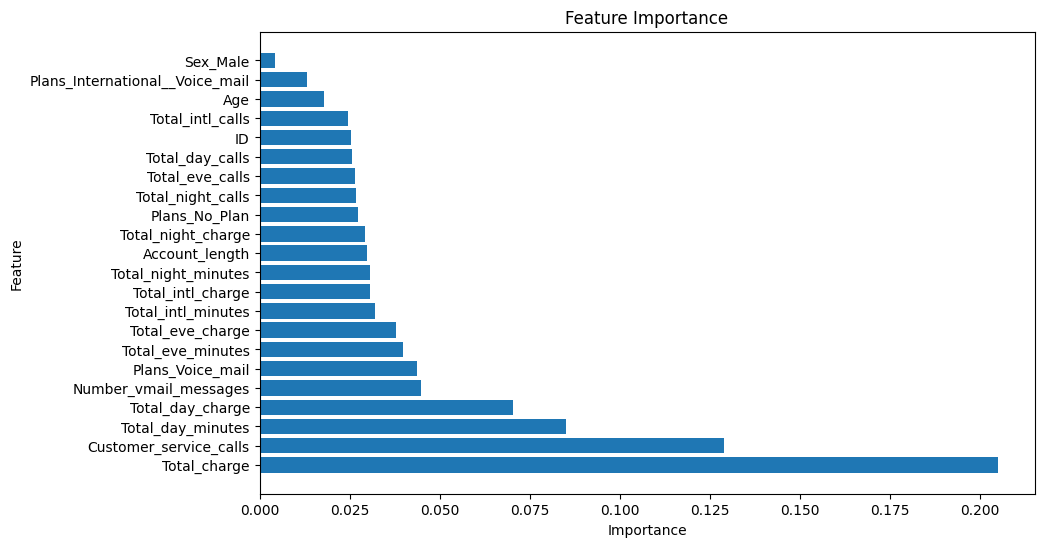

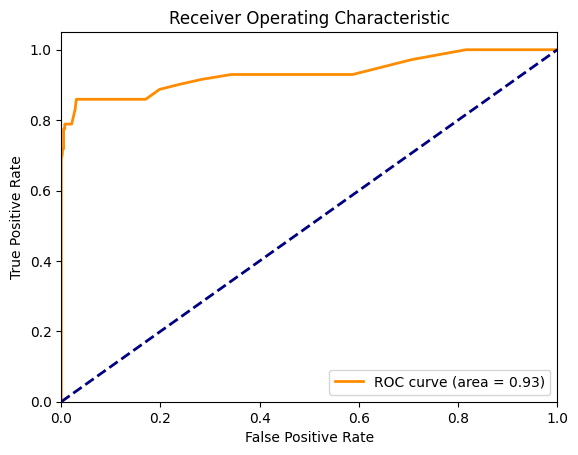

In [28]:
# make an area under the curve model

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (assuming it's in the Colab environment)
data = pd.read_csv('/content/train.csv', delimiter=';')

# Preprocessing steps (as in your original code)
data = data.drop(['Phone number', 'State'], axis=1)
data['Plans'] = data['Plans'].fillna('No Plan')
data = pd.get_dummies(data, columns=['Sex', 'Plans'], drop_first=True)

for col in ['Total day minutes', 'Total day calls', 'Total night minutes', 'Total intl minutes', 'Total charge', 'Customer service calls']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.fillna(0, inplace=True)
X = data.drop('Churn', axis=1)
y = data['Churn']
X.columns = X.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)


# Ensure all columns in X are numeric using Label Encoding
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (example: RandomForest)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ... (rest of your model training and evaluation code)


# Feature importance plot (AUC not directly applicable here)
importance = rf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importance})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Example: Predict probabilities for the test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probability of churn (class 1)


# Example: Create a ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
test_data = pd.read_csv('/content/test.csv', delimiter=',')
test_data.head()

,ID,Sex,Age,State,Account length,Phone number,Plans,Number vmail messages,Total day minutes,Total day calls,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Total charge,Customer service calls
0,10007,Male,32.0,TX,71,415 550 95 54,Voice mail,39,183.2,103,...,111,17.80,172.4,109,7.76,11.9,6,3.21,59.91,1
1,10134,Male,31.0,CT,147,415 933 19 41,NaN,0,124.4,74,...,78,27.28,157.2,126,7.07,10.4,4,2.81,58.31,2
2,10464,Female,NaN,UT,36,415 528 80 70,Voice mail,16,149.4,111,...,113,11.20,132.7,87,5.97,6.7,2,1.81,44.38,0
3,10490,Male,36.0,MO,167,415 720 71 11,International,0,244.8,91,...,105,5.17,176.7,110,7.95,10.7,3,2.89,57.63,2
4,10556,Female,41.0,OR,48,415 846 34 64,NaN,0,190.4,92,...,85,26.99,133.4,113,6.00,8.3,4,2.24,67.60,2


In [30]:
# Preprocess the test data to match the training data preprocessing

test_data = test_data.drop(['Phone number', 'State'], axis=1)
test_data['Plans'] = test_data['Plans'].fillna('No Plan')
test_data = pd.get_dummies(test_data, columns=['Sex', 'Plans'], drop_first=True)

for col in ['Total day minutes', 'Total day calls', 'Total night minutes', 'Total intl minutes', 'Total charge', 'Customer service calls']:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
test_data.fillna(0, inplace=True)


In [31]:
# based on the train data and above models use the models to predict if a customer will churn with the test data. you will not be given the answer on if the customer churned so you have to predict it based off the train data

# Ensure all columns in the test data are numeric
for col in test_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    # Handle unseen labels in test data
    if col in X_train.columns:
      le.fit(X_train[col]) # Fit on train data to avoid errors on unseen values
      test_data[col] = le.transform(test_data[col])
    else:
      # Handle the case where the column is not present in training data
      print(f"Warning: Column '{col}' not in training data. Dropping from test data.")
      test_data.drop(columns=[col], inplace=True)

# Align columns between training and testing data
# Replace spaces and special characters in test_data column names with underscores to match X_train
test_data.columns = test_data.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # This line is added

# Get missing columns in test_data compared to X_train
missing_cols = set(X_train.columns) - set(test_data.columns)
# Add missing columns to test_data and fill with 0
for c in missing_cols:
    test_data[c] = 0
# Remove extra columns from test_data that are not in X_train
extra_cols = set(test_data.columns) - set(X_train.columns)
for c in extra_cols:
    test_data.drop(columns=[c], inplace=True) #Remove extra columns

# Reorder columns in test_data to match X_train
test_data = test_data[X_train.columns]





# Make predictions on the test data using the RandomForest model
rf_predictions = rf.predict(test_data)
print("\nRandom Forest Predictions:")
rf_predictions


Random Forest Predictions:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
# can you display the probability of each customer churning connect it to their ID coloumn

# Assuming 'rf' is your trained RandomForestClassifier and 'test_data' is your preprocessed test data
# Get the churn probabilities for each customer
churn_probabilities = rf.predict_proba(test_data)[:, 1]

# Create a DataFrame with customer IDs and churn probabilities
customer_churn_probs = pd.DataFrame({'ID': test_data['ID'], 'Churn_Probability': churn_probabilities})

# Display the results
customer_churn_probs

,ID,Churn_Probability
0,10007,0.06
1,10134,0.12
2,10464,0.01
3,10490,0.14
4,10556,0.08
...,...,...
825,99221,0.08
826,99297,0.10
827,99328,0.04
828,99400,0.06


In [33]:
# turn customer_churn_probs into a csv

# Assuming 'customer_churn_probs' DataFrame is already created as in your code
# ... (Your existing code)

# Save the DataFrame to a CSV file
customer_churn_probs.to_csv('customer_churn_probs.csv', index=False)

# Download the CSV file to your local machine (optional)
from google.colab import files
files.download('customer_churn_probs.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>